In [ ]:
import pandas  as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy  as np
import seaborn as sns
#from nltk.tokenize import word_tokenize

import nltk
import re
import requests

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
retail=requests.get("https://www.ibef.org/industry/retail-india")

In [ ]:
retaildf=BeautifulSoup(retail.content)

In [ ]:
retailtxt=retaildf.getText(strip=True)


In [ ]:
retailtxt

"Retail Industry in India: Overview of Retail Sector, Market Size, Growth...IBEFLOGINHomeAbout usAnnual ReportsBoard of TrusteesCareersTendersIndian EconomyDomestic InvestmentsEconomic Survey 2023-24Foreign Direct InvestmentForeign Institutional InvestorsForeign Trade Policy 2023Government SchemesIndia PositiveIndia: A SnapshotIndian Economy NewsIndian Economy OverviewIndian Investments AbroadInvestmentsMake in IndiaMonthly Economic ReportPolicy WatchQuick FactsStartup IndiaTradeUnion Budget 2024-25Useful LinksIndustryAgriculture and Allied IndustriesAuto ComponentsAutomobilesAviationAyushBankingBiotechnologyCementChemicalsConsumer DurablesDefence ManufacturingE-CommerceEducation and TrainingElectric VehicleElectronics System Design & ManufacturingEngineering and Capital GoodsFinancial ServicesFMCGFood ProcessingGems and JewelleryHealthcareInfrastructureInsuranceIT & BPMManufacturingMedia and EntertainmentMedical DevicesMetals and MiningMSMEOil and GasPaper & PackagingPharmaceuticalsPo

In [ ]:
retailtxt=re.sub(r'\[d+\]'," ",retailtxt)

In [ ]:
retailtxt=re.sub(r'\(d+\)'," ",retailtxt)

In [ ]:
retailtxt=re.sub(r'\[w+\]'," ",retailtxt)

In [ ]:
retailtxt=re.sub(r'\(w+\)'," ",retailtxt)

In [ ]:
retailtxt=re.sub('[\(\[].*?[\)\]]'," ",retailtxt)

In [ ]:
retailtxt=re.sub("\'s"," ",retailtxt)

In [ ]:
retailtxt=re.sub("\xa02021"," ",retailtxt)

In [ ]:
retailtxt=re.sub("[0-9]+"," ",retailtxt)

In [ ]:
retailtxt

"Retail Industry in India: Overview of Retail Sector, Market Size, Growth...IBEFLOGINHomeAbout usAnnual ReportsBoard of TrusteesCareersTendersIndian EconomyDomestic InvestmentsEconomic Survey  - Foreign Direct InvestmentForeign Institutional InvestorsForeign Trade Policy  Government SchemesIndia PositiveIndia: A SnapshotIndian Economy NewsIndian Economy OverviewIndian Investments AbroadInvestmentsMake in IndiaMonthly Economic ReportPolicy WatchQuick FactsStartup IndiaTradeUnion Budget  - Useful LinksIndustryAgriculture and Allied IndustriesAuto ComponentsAutomobilesAviationAyushBankingBiotechnologyCementChemicalsConsumer DurablesDefence ManufacturingE-CommerceEducation and TrainingElectric VehicleElectronics System Design & ManufacturingEngineering and Capital GoodsFinancial ServicesFMCGFood ProcessingGems and JewelleryHealthcareInfrastructureInsuranceIT & BPMManufacturingMedia and EntertainmentMedical DevicesMetals and MiningMSMEOil and GasPaper & PackagingPharmaceuticalsPortsPowerRai

In [ ]:
from nltk.tokenize import sent_tokenize,word_tokenize
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
retail_sentences=sent_tokenize(retailtxt)

In [ ]:
retail_sentences=pd.DataFrame(retail_sentences,columns=["sentences"])

In [ ]:
retail_sentences.head(2)

,sentences
0,Retail Industry in India: Overview of Retail S...
1,"billion in , with an annual growth rate of ."


In [ ]:
from textblob import TextBlob

In [ ]:
s1=TextBlob("Pranav is greatest player Cricket")
s1.sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

In [ ]:
s1=TextBlob("Pranav is greatest playing Cricket who has most runs")
s1.sentiment

Sentiment(polarity=0.75, subjectivity=0.75)

In [ ]:
def analyze_sentiment(text):
    analysis=TextBlob(text)
    if analysis.sentiment.polarity>0:
        return "Positive"
    elif analysis.sentiment.polarity==0:
        return "Neutral"
    else:
        return "Negative"

In [ ]:
retail_sentences['sentiment']=[str(analyze_sentiment(x))
                            for x in retail_sentences.sentences]

In [ ]:
retail_sentences['sentiment'].value_counts()

,count
sentiment,
Neutral,38
Positive,30
Negative,8


In [ ]:
Retailwords=word_tokenize(retailtxt)

In [ ]:
Retailwords

['Retail',
 'Industry',
 'in',
 'India',
 ':',
 'Overview',
 'of',
 'Retail',
 'Sector',
 ',',
 'Market',
 'Size',
 ',',
 'Growth',
 '...',
 'IBEFLOGINHomeAbout',
 'usAnnual',
 'ReportsBoard',
 'of',
 'TrusteesCareersTendersIndian',
 'EconomyDomestic',
 'InvestmentsEconomic',
 'Survey',
 '-',
 'Foreign',
 'Direct',
 'InvestmentForeign',
 'Institutional',
 'InvestorsForeign',
 'Trade',
 'Policy',
 'Government',
 'SchemesIndia',
 'PositiveIndia',
 ':',
 'A',
 'SnapshotIndian',
 'Economy',
 'NewsIndian',
 'Economy',
 'OverviewIndian',
 'Investments',
 'AbroadInvestmentsMake',
 'in',
 'IndiaMonthly',
 'Economic',
 'ReportPolicy',
 'WatchQuick',
 'FactsStartup',
 'IndiaTradeUnion',
 'Budget',
 '-',
 'Useful',
 'LinksIndustryAgriculture',
 'and',
 'Allied',
 'IndustriesAuto',
 'ComponentsAutomobilesAviationAyushBankingBiotechnologyCementChemicalsConsumer',
 'DurablesDefence',
 'ManufacturingE-CommerceEducation',
 'and',
 'TrainingElectric',
 'VehicleElectronics',
 'System',
 'Design',
 '&',


In [ ]:
Retailwords=[w for w in  Retailwords if w.isalnum()]

In [ ]:
Retailwords=[w.lower() for w in Retailwords]

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
english_stopwords=set(stopwords.words('english'))

In [ ]:
Retailwords=[w for w in Retailwords if w not in english_stopwords]

In [ ]:
Retailwords=[w for w in Retailwords if len(w)>2]

In [ ]:
from nltk.probability import FreqDist

In [ ]:
wordfreq=FreqDist(Retailwords)

In [ ]:
from wordcloud import WordCloud

In [ ]:
Retail_words=(" ").join(Retailwords)

In [ ]:
wordcloud=WordCloud(width=1000,height=500,stopwords="english_stopwords",max_words=250,collocations=False).generate(str(Retail_words))

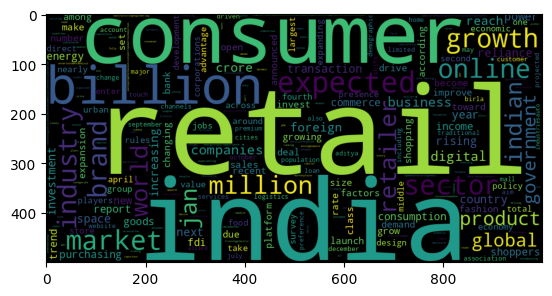

In [ ]:
plt.imshow(wordcloud)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
DTM=CountVectorizer(max_features=20,stop_words="english")

In [ ]:
X_DTM=DTM.fit_transform(Retailwords)

In [ ]:
pd.DataFrame(X_DTM.toarray(),columns=DTM.get_feature_names_out()).head(3)

,billion,business,companies,consumer,crore,digital,expected,global,government,growth,india,indian,industry,jan,market,million,online,retail,sector,world
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
retail_sentences.head(3)

,sentences,sentiment
0,Retail Industry in India: Overview of Retail S...,Positive
1,"billion in , with an annual growth rate of .",Neutral
2,% to reach US$ .,Neutral


In [ ]:
X_DTM_sentences=DTM.fit_transform(retail_sentences)

In [ ]:
pd.DataFrame(X_DTM_sentences.toarray(),columns=DTM.get_feature_names_out()).head()

,sentences,sentiment
0,1,0
1,0,1


In [ ]:
DTM_Bigrams=CountVectorizer(max_features=20,stop_words="english",ngram_range=(2,2))


In [ ]:
X_Bigrams=DTM_Bigrams.fit_transform(retail_sentences.sentences)

In [ ]:
pd.DataFrame(X_Bigrams.toarray(),columns=DTM_Bigrams.get_feature_names_out()).head(2)

,announced launch,digital commerce,expected reach,india consumer,india expected,india retail,market india,market size,middle class,online shoppers,presence india,purchasing power,reach million,reliance brands,retail industry,retail market,retail sector,retail space,sector india,shoppers india
0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,2,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


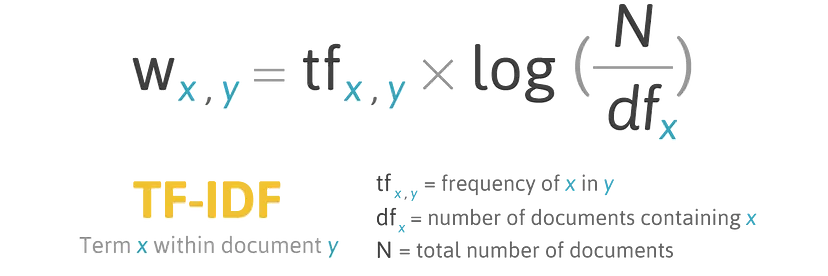

In [ ]:
from IPython.display import Image, display
from io import BytesIO
import requests


image_url = "https://miro.medium.com/v2/resize:fit:828/format:webp/1*V9ac4hLVyms79jl65Ym_Bw.jpeg"
response = requests.get(image_url)
image = Image(data=response.content)

display(image)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
Tfidf=TfidfVectorizer(max_features=20,stop_words="english",ngram_range=(2,2))

In [ ]:
X_Tfidf=Tfidf.fit_transform(retail_sentences.sentences)

In [ ]:
pd.DataFrame(X_Tfidf.toarray(),columns=Tfidf.get_feature_names_out()).head()


,announced launch,digital commerce,expected reach,india consumer,india expected,india retail,market india,market size,middle class,online shoppers,presence india,purchasing power,reach million,reliance brands,retail industry,retail market,retail sector,retail space,sector india,shoppers india
0,0.0,0.0,0.388229,0.0,0.0,0.0,0.0,0.432545,0.0,0.0,0.0,0.0,0.0,0.0,0.742762,0.0,0.332397,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


In [ ]:
pd.DataFrame(X_Tfidf.toarray(),columns=Tfidf.get_feature_names_out()).head(2)

,announced launch,digital commerce,expected reach,india consumer,india expected,india retail,market india,market size,middle class,online shoppers,presence india,purchasing power,reach million,reliance brands,retail industry,retail market,retail sector,retail space,sector india,shoppers india
0,0.0,0.0,0.388229,0.0,0.0,0.0,0.0,0.432545,0.0,0.0,0.0,0.0,0.0,0.0,0.742762,0.0,0.332397,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
